<a href="https://colab.research.google.com/github/OptimalDecisions/sports-analytics-foundations/blob/main/data-visualization/Data_Visualization_3_4_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ## Data Visualization



  # Plotting with Seaborn

  <img src = "../img/sa_logo.png" width="100" align="left">

  Ram Narasimhan

  <br><br><br>

  << [3.0 Visualization Overview](Data_Visualization_3_0_Overview.ipynb) | [3.1 Visualization Using Pandas](Pandas_Intermediate_2_10_GroupBy.ipynb)  |
  [3.2 Matplotlib Basics](Data_Visualization_3_2_Matplotlib_Basics.ipynb) >>




Concepts covered in this notebook.

1. Heatmaps
2. Pairplots
3. Color Palettes in Seaborn


### When to use Seaborn?

- Seaborn is a statistical data visualization library built on top of Matplotlib.
- It provides a high-level interface for creating aesthetically pleasing and informative statistical graphics.
- Seaborn simplifies the process of creating complex plots and enhances the default Matplotlib visualizations.

If you want to build a plot step-by-step, layer by layer, then try Plotting using Pandas, or Matplotlib.

However, for certain types of plots, Seaborn is excellent. It creates really good quality and aesthetic plots that don't require much of customization. (Example: Heatmaps, pair plots etc.)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Basic Plotting with Seaborn

In [2]:
tennis_data = {
    'Player': ['Federer', 'Nadal', 'Djokovic', 'Murray', 'Thiem'],
    'Matches_Won': [20, 18, 22, 15, 17],
    'Matches_Played': [25, 22, 24, 20, 21],
    'Aces': [120, 80, 110, 95, 100]
}

tennis_df = pd.DataFrame(tennis_data)



### Scatter Plots using Seaborn

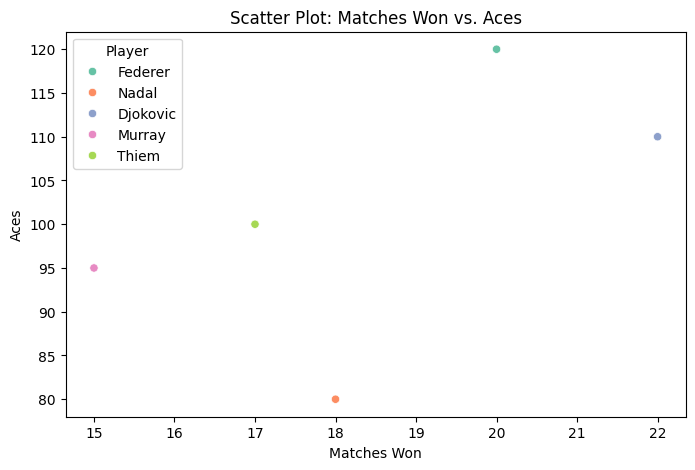

In [3]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Matches_Won', y='Aces', data=tennis_df, hue='Player', palette='Set2')
plt.title('Scatter Plot: Matches Won vs. Aces')
plt.xlabel('Matches Won')
plt.ylabel('Aces')
plt.show()


### Line Plot


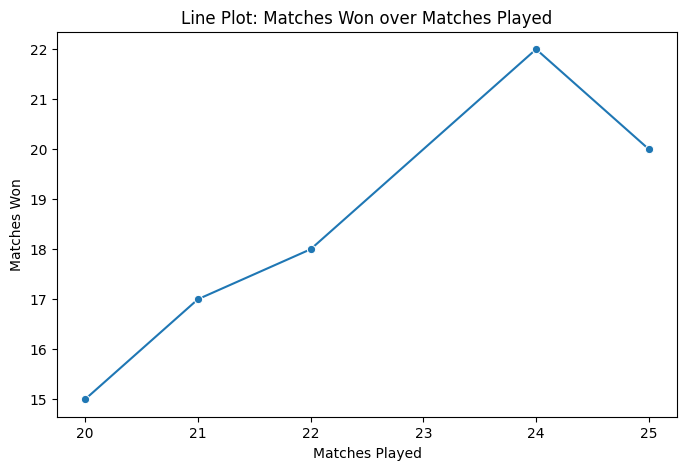

In [4]:
# Line plot
plt.figure(figsize=(8, 5))
sns.lineplot(x='Matches_Played', y='Matches_Won', data=tennis_df,
             marker='o')
plt.title('Line Plot: Matches Won over Matches Played')
plt.xlabel('Matches Played')
plt.ylabel('Matches Won')
plt.show()



### Bar Plot

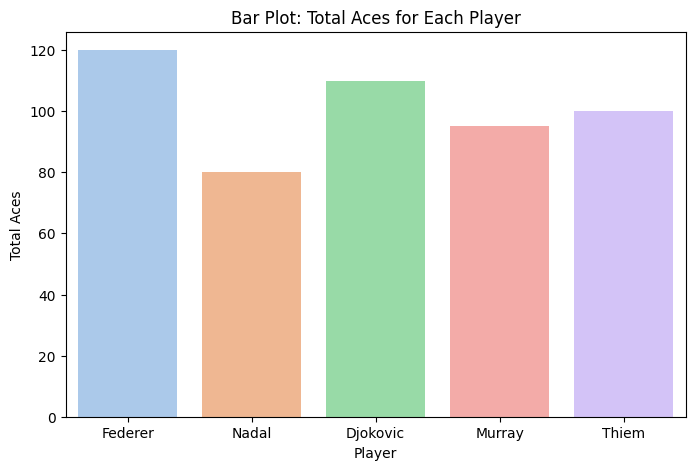

In [5]:
# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Player', y='Aces', data=tennis_df, hue='Player', palette='pastel')
plt.title('Bar Plot: Total Aces for Each Player')
plt.xlabel('Player')
plt.ylabel('Total Aces')
plt.show()


## Heatmaps Using Seaborn

A heatmap is a graphical representation of data where values in a matrix are represented as colors.

Heatmaps are particularly useful for visualizing relationships and patterns in large datasets.

Let's look at one example:




In [7]:
url = 'https://raw.githubusercontent.com/OptimalDecisions/sports-analytics-foundations/main/data/nfl_2022_games.csv'
nfl = pd.read_csv(url)
nfl.dropna(subset=['Week'], inplace=True)
columns_to_keep = ['Week', 'Winner/tie', 'PtsW', "YdsW", 'Loser/tie', "PtsL", 'YdsL']
nfl = nfl[columns_to_keep].copy()
nfl.rename(columns = {'Winner/tie': "Winner", "Loser/tie":'Loser'},inplace=True)

tidy_df = pd.melt(nfl, id_vars=['Week', 'Winner', 'Loser'],
                  value_vars=['YdsW', 'YdsL', 'PtsW', 'PtsL'],
                  var_name='Metric', value_name='Value')


# If the Metric is YdsW or PtsW, then we label is a winner_row
tidy_df['winner_row'] = tidy_df['Metric'].str.endswith('W')
tidy_df['Team'] = tidy_df.apply(lambda row:
                                row['Winner'] if row['winner_row'] \
                                else row['Loser'],
                                axis=1)
tidy_df = tidy_df[['Week', 'Team', 'Metric', 'Value']].copy()

# Add a "0" to values from "1" through "9"
tidy_df['Week'] = tidy_df['Week'].apply(
    lambda x: x.zfill(2) if x.isdigit() and 1 <= int(x) <= 9 else x)

#the following condition makes sure that we don't rename twice
if not(any(tidy_df['Week'].str.contains('1wild'))):
  tidy_df['Week'] = tidy_df['Week'].str.replace("Wild", "1Wild")
  tidy_df['Week'] = tidy_df['Week'].str.replace("Div", "2Div")


yds_cond = tidy_df['Metric'].str.contains("Yds")
pts_cond =tidy_df['Metric'].str.contains("Pts")
heat_yds = tidy_df[yds_cond].pivot(index="Team", columns="Week", values="Value")
heat_pts = tidy_df[pts_cond].pivot(index="Team", columns="Week", values="Value")

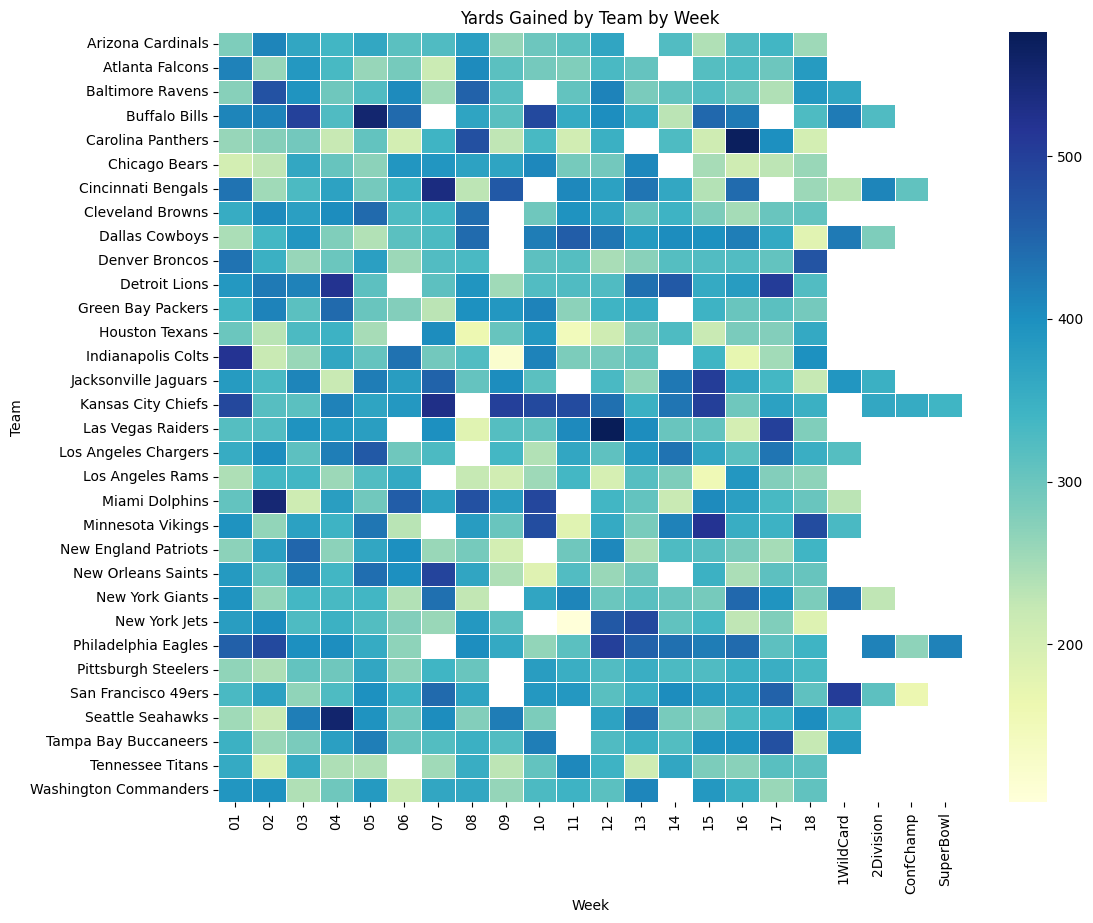

In [8]:
# Create a customized heatmap
plt.figure(figsize=(12,10))
sns.heatmap(heat_yds, cmap="YlGnBu", linewidths=.5)

# Add title and labels
plt.title("Yards Gained by Team by Week")
plt.xlabel("Week")
plt.ylabel("Team")

# Show the plot
plt.show()

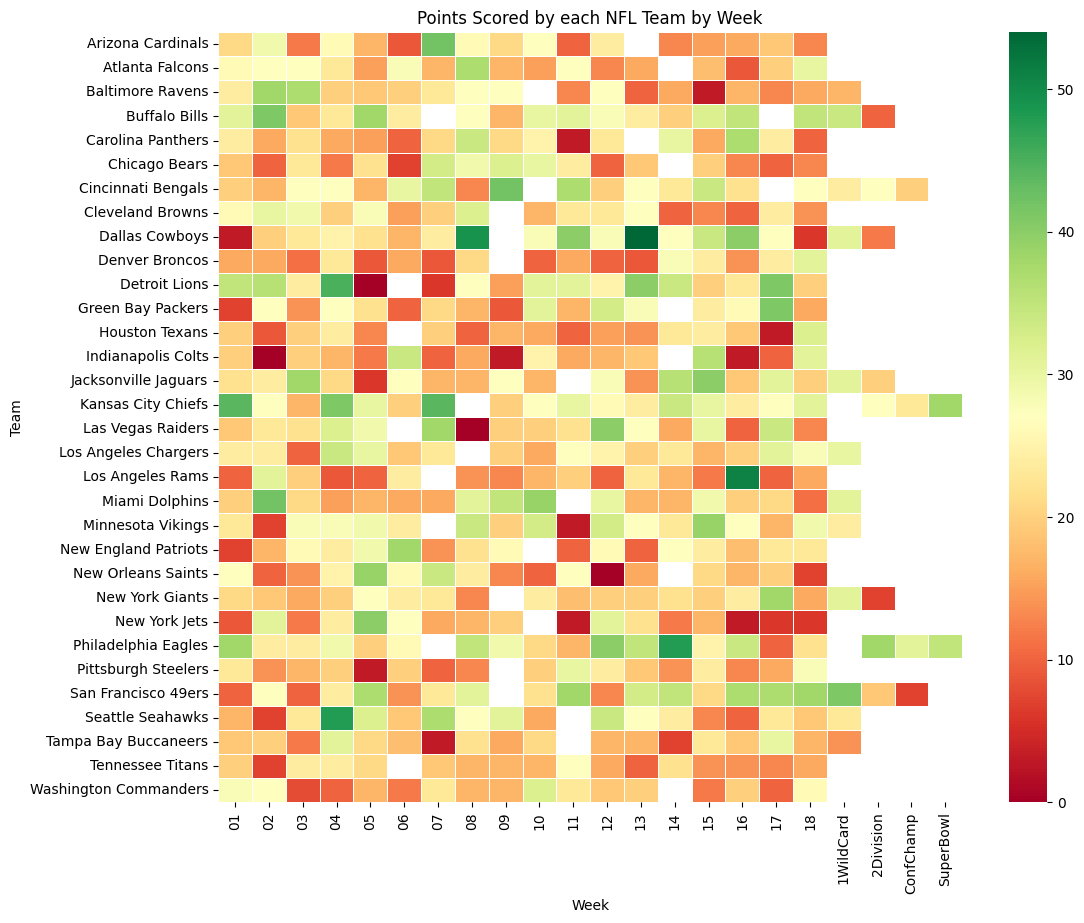

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(heat_pts,  cmap="RdYlGn", linewidths=.5)

# Add title and labels
plt.title("Points Scored by each NFL Team by Week")
plt.xlabel("Week")
plt.ylabel("Team")

# Show the plot
plt.show()

## Pairplots

Seaborn comes with a high-level function called `pairplot()` - which plots multiple pairwise bivariate distributions in a dataset.

The diagonal plots are histograms. The other plots are the scatterplot for each pair of variables.


<Figure size 800x800 with 0 Axes>

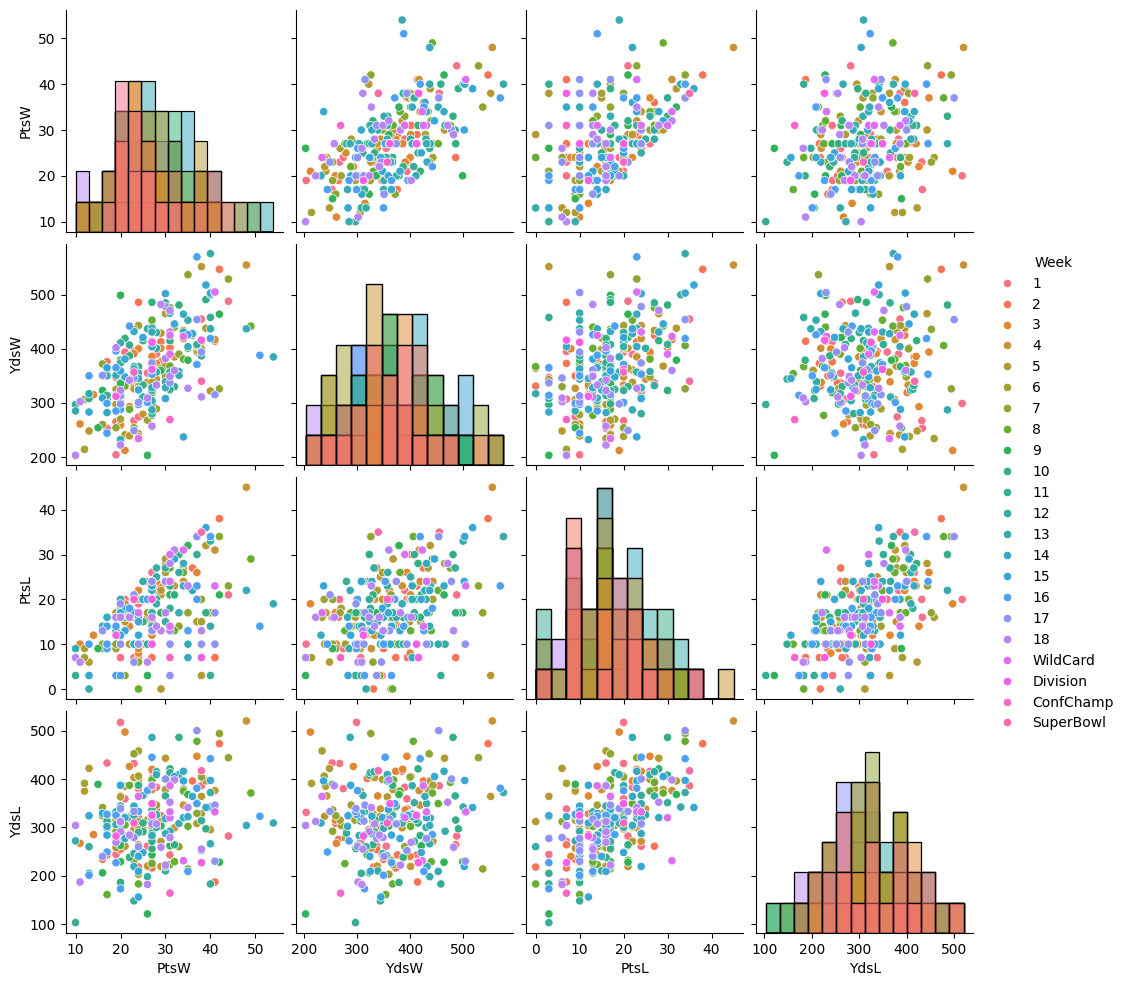

In [26]:
plt.figure(figsize=(8,8 ))
sns.pairplot(nfl, hue="Week", diag_kind="hist")

  << [3.0 Visualization Overview](Data_Visualization_3_0_Overview.ipynb) | [3.1 Visualization Using Pandas](Pandas_Intermediate_2_10_GroupBy.ipynb)  |
  [3.2 Matplotlib Basics](Data_Visualization_3_2_Matplotlib_Basics.ipynb) >>
